In [109]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [110]:
df = pd.read_csv("C:/Users/devan/Downloads/pincode.csv")

C:\Users\devan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [111]:
df

CircleName       RegionName       DivisionName  \
0       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
1       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
2       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
3       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
4       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
...                       ...              ...                ...   
157121   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157122   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157123   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157124          Kerala Circle   Calicut Region   Calicut Division   
157125          Kerala Circle   Calicut Region   Calicut Division   

                 OfficeName  Pincode OfficeType      Delivery   District  \
0            Peddakotla B.O   515631         BO      Delivery  ANANTAPUR   
1            Pinnadhari B.O   515631         BO      Delivery  ANANTAPUR   
2       Yerraguntapalle B.O   515631         BO      Delivery  ANANTAPUR   
3       Obulareddipalli B.O   515581         BO      Delivery  ANANTAPUR   
4            Odulapalli B.O   515581         BO      Delivery  ANANTAPUR   
...                     ...      ...        ...           ...        ...   
157121   Rly Road Meerut SO   250002         PO  Non Delivery     MEERUT   
157122           SGMandi SO   250002         PO  Non Delivery     MEERUT   
157123          W K Road SO   250001         PO  Non Delivery     MEERUT   
157124           Kakkoti SO   673611         PO      Delivery  KOZHIKODE   
157125         Kotuvalli SO   673572         PO      Delivery  KOZHIKODE   

             StateName   Latitude  Longitude  
0       ANDHRA PRADESH    14.5689   77.85624  
1       ANDHRA PRADESH    14.5281  77.857014  
2       ANDHRA PRADESH  14.561111   77.85715  
3       ANDHRA PRADESH    14.2488    78.2588  
4       ANDHRA PRADESH   14.24555    78.2477  
...                ...        ...        ...  
157121   UTTAR PRADESH      28.98      77.68  
157122   UTTAR PRADESH    28.9724   77.67536  
157123   UTTAR PRADESH      28.99      77.71  
157124          KERALA   11.24529  75.778455  
157125          KERALA      11.35      75.91  

[157126 rows x 11 columns]

In [112]:
df.shape

(157126, 11)

In [113]:
df.sample(5)

CircleName                RegionName          DivisionName  \
23340          Gujarat Circle       Ahmedabad HQ Region        Patan Division   
148069       Tamilnadu Circle  Southern Region, Madurai      Madurai Division   
70401   Madhya Pradesh Circle        DivReportingCircle  Hoshangabad Division   
129540         Haryana Circle        DivReportingCircle       Hissar Division   
116050   Uttar Pradesh Circle          Gorakhpur Region     Bahraich Division   

                 OfficeName  Pincode OfficeType  Delivery     District  \
23340            Kunwara BO   384265         BO  Delivery        PATAN   
148069       Sholavandan SO   625214         PO  Delivery      MADURAI   
70401            Posera B.O   461775         BO  Delivery  HOSHANGABAD   
129540  Siri Jiwan Nagar SO   125075         PO  Delivery        SIRSA   
116050            Kaudha BO   271902         BO  Delivery     BAHRAICH   

             StateName    Latitude   Longitude  
23340          GUJARAT       23.98       72.26  
148069      TAMIL NADU      10.378  78.0167222  
70401   MADHYA PRADESH   22.820611    78.41266  
129540         HARYANA  29.5275278  74.7394722  
116050   UTTAR PRADESH    27.39585    81.47279

In [114]:
df.info

<bound method DataFrame.info of                    CircleName       RegionName       DivisionName  \
0       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
1       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
2       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
3       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
4       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
...                       ...              ...                ...   
157121   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157122   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157123   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157124          Kerala Circle   Calicut Region   Calicut Division   
157125          Kerala Circle   Calicut Region   Calicut Division   

                 OfficeName  Pincode OfficeType      Delivery   District  \
0            Peddakotla B.O   515631         BO      Delivery  

In [115]:
df.describe

<bound method NDFrame.describe of                    CircleName       RegionName       DivisionName  \
0       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
1       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
2       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
3       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
4       Andhra Pradesh Circle   Kurnool Region  Hindupur Division   
...                       ...              ...                ...   
157121   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157122   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157123   Uttar Pradesh Circle  Bareilly Region    Meerut Division   
157124          Kerala Circle   Calicut Region   Calicut Division   
157125          Kerala Circle   Calicut Region   Calicut Division   

                 OfficeName  Pincode OfficeType      Delivery   District  \
0            Peddakotla B.O   515631         BO      Delivery

In [116]:
df.dtypes

CircleName      object
RegionName      object
DivisionName    object
OfficeName      object
Pincode          int64
OfficeType      object
Delivery        object
District        object
StateName       object
Latitude        object
Longitude       object
dtype: object

In [117]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if applicable)
df = df.dropna()

CircleName         0
RegionName        53
DivisionName       2
OfficeName         0
Pincode            0
OfficeType         0
Delivery           0
District           0
StateName          0
Latitude        8838
Longitude       8843
dtype: int64


In [118]:
summary_statistics = df.describe()

# EDA

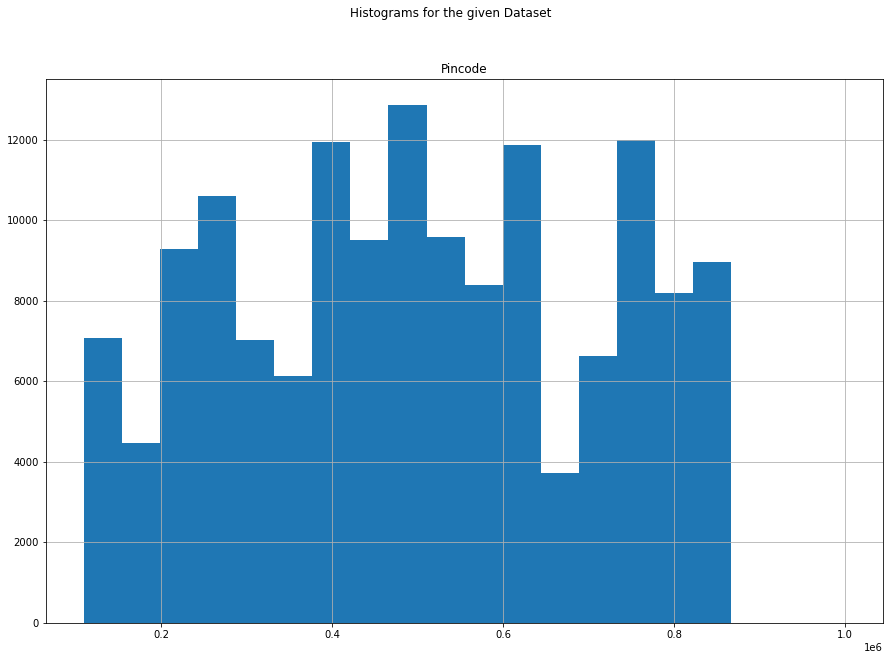

In [29]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for the given Dataset')
plt.show()

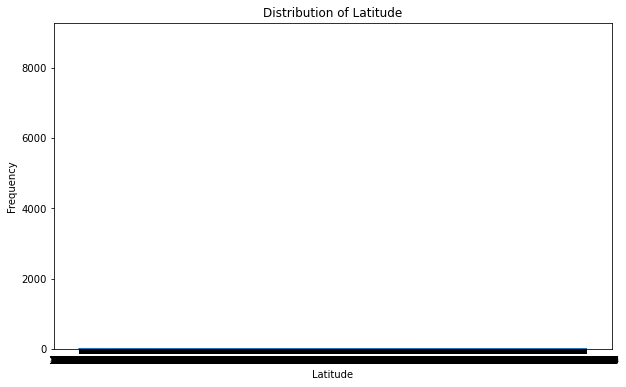

In [7]:
# Step 3: Univariate Analysis
# Convert 'Latitude' column to strings
# Use .loc to directly modify the original DataFrame
df.loc[:, 'Latitude'] = df['Latitude'].astype(str)

# Plot histogram after converting to strings
plt.figure(figsize=(10, 6))
sns.histplot(df['Latitude'], bins=20, kde=True)
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

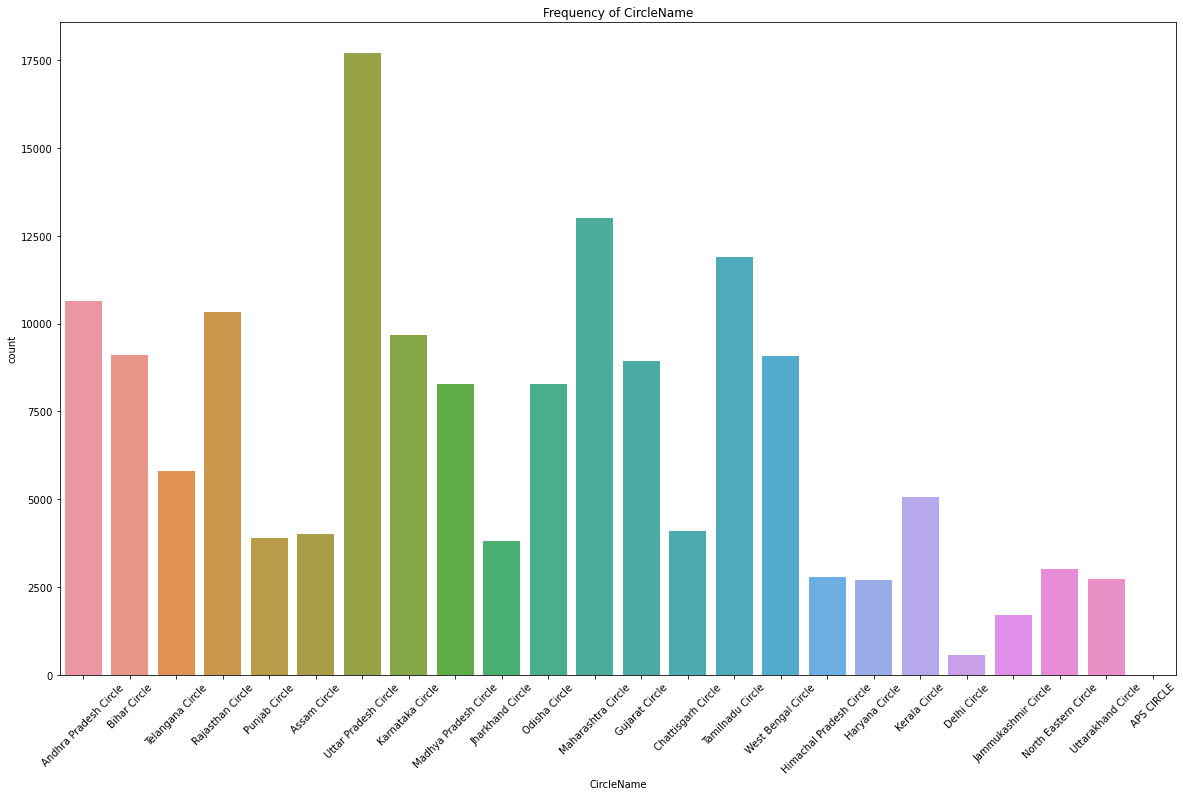

In [10]:
plt.figure(figsize=(20, 12))
sns.countplot(x='CircleName', data=df)
plt.title('Frequency of CircleName')
plt.xticks(rotation=45)
plt.show()

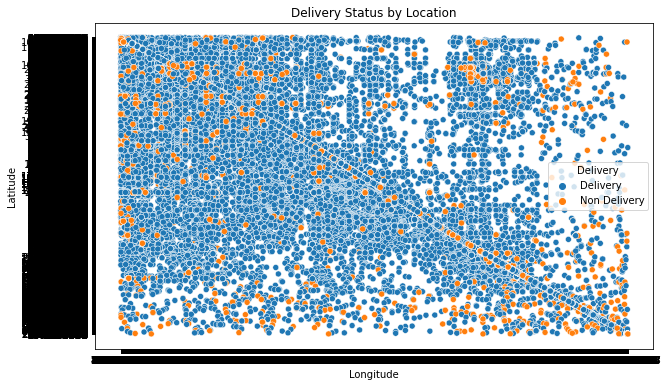

In [12]:
# Step 4: Bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Delivery')
plt.title('Delivery Status by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Delivery')
plt.show()

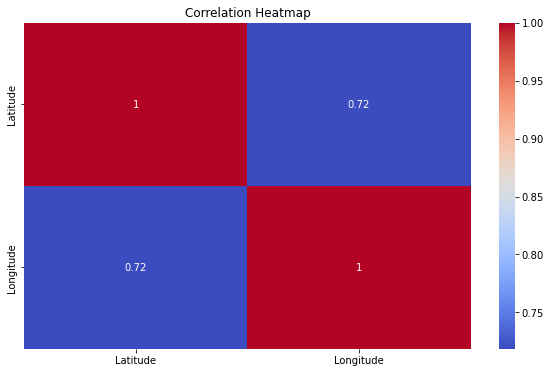

In [51]:
# Step 5: Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Latitude', 'Longitude']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [70]:
#Step 6: Geospatial Analysis
# Assuming df is your DataFrame containing latitude, longitude, and OfficeName columns
# Drop rows with NaN values in latitude or longitude columns
df_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Create Folium Map
map = folium.Map(location=[df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()], zoom_start=6)

# Add markers to the map
for index, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['OfficeName']).add_to(map)

# Save the map
map.save('office_locations.html')

In [121]:
# Step 7: Feature Engineering
# Assuming df is your DataFrame containing 'Latitude' and 'Longitude' columns
# Convert 'Latitude' and 'Longitude' to numeric types, coercing errors to NaN
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows with NaN values in 'Latitude' or 'Longitude' columns
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Calculate the centroid
centroid = (df['Latitude'].mean(), df['Longitude'].mean())

# Calculate distance from centroid using .loc to avoid SettingWithCopyWarning
df.loc[:, 'Distance_from_centroid'] = df.apply(
    lambda row: ((row['Latitude'] - centroid[0])**2 + (row['Longitude'] - centroid[1])**2)**0.5, 
    axis=1
)

C:\Users\devan\AppData\Local\Temp/ipykernel_21660/3245222715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
C:\Users\devan\AppData\Local\Temp/ipykernel_21660/3245222715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
C:\Users\devan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [122]:
# Step 8: Outlier Detection and Handling
# Example: Detect outliers using z-score
z_scores = (df[['Latitude', 'Longitude']] - df[['Latitude', 'Longitude']].mean()) / df[['Latitude', 'Longitude']].std()
outliers = z_scores[abs(z_scores) > 3].dropna()
print("Outliers:", outliers)

Outliers:          Latitude  Longitude
25038   27.422135  29.742130
28022   27.548974  29.752676
28023   28.736650  29.995224
28024   26.880186  30.083104
28025   27.560505  30.005770
...           ...        ...
39923   27.975615  29.777282
42259    8.052645   8.700879
53871   24.541733  11.136557
142265  27.422135  29.742130
142266  27.502851  29.984679

[124 rows x 2 columns]


In [123]:
# Step 9: Model Fitting
# Assuming 'X' contains features and 'y' contains the target variable
X = df[['Latitude', 'Longitude', 'Distance_from_centroid']]  
y = df['Delivery']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

In [124]:
# Step 10: Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9510118585087334


In [127]:
# Step 11: Model Evaluation
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, pos_label='Delivery')
recall = recall_score(y_test, y_pred, pos_label='Delivery')
f1 = f1_score(y_test, y_pred, pos_label='Delivery')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9621180555555555
Recall: 0.9872096337466154
F1 Score: 0.9745023563339664
